In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
iris = load_iris()

In [2]:
X = iris.data
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
#preprocessing to bring everything in a better Scale

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
#KNN CLASS 

import numpy as np

class KNN:
    def __init__(self, k=5, metric='euclidean'):
        self.k = k
        self.metric = metric
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            dist = []
            for j in range(self.X.shape[0]):
                if self.metric == 'euclidean':
                    d = np.sqrt(np.sum((X[i] - self.X[j])**2))
                elif self.metric == 'manhattan':
                    d = np.sum(np.abs(X[i] - self.X[j]))
                elif self.metric == 'cosine':
                    d = 1 - np.dot(X[i], self.X[j]) / (np.linalg.norm(X[i]) * np.linalg.norm(self.X[j]))
                dist.append((d, self.y[j]))
            dist.sort()
            y_pred.append(np.sign(np.sum([y[1] for y in dist[:self.k]])))
        return np.array(y_pred)

In [6]:
from sklearn.metrics import accuracy_score

# Initialize the KNN model
knn = KNN(k=1, metric='manhattan')

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)
print(y_pred[:5])
print(y_test[:5])

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {accuracy:.2f}")

[1 0 1 1 1]
[1 0 2 1 1]
Accuracy score: 0.63


In [7]:
#printing the test and predicted values respetively 

print(y_test[:5])
print(y_pred[:5])

[1 0 2 1 1]
[1 0 1 1 1]


In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10  0  0]
 [ 0  9  0]
 [ 0 11  0]]


0.6333333333333333

<AxesSubplot: >

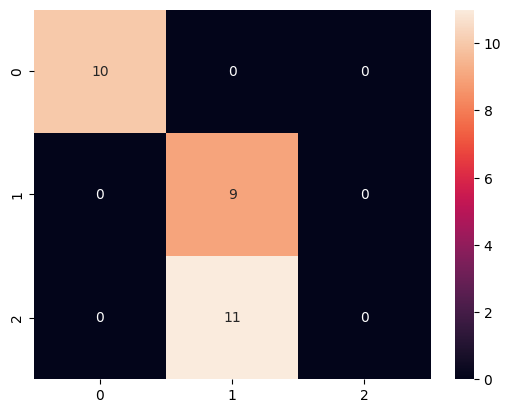

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred),annot = True)